In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

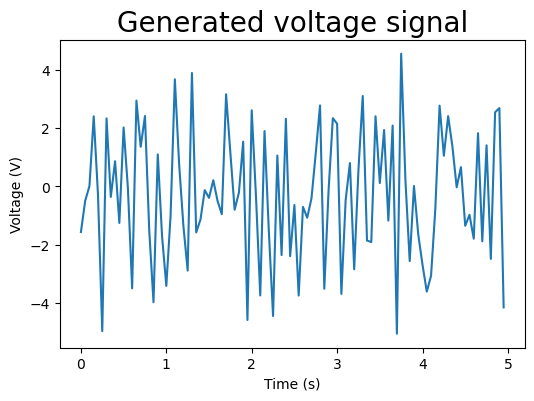

In [3]:
fs = 20 # Sampling rate
N = 100 # Number of Data Points

time = np.arange(N) / fs  # these are the time coordinates of the voltage "measurements".  Total signal time is num of points / sampling rate

v = np.random.normal(scale=np.sqrt(5), size=time.shape) # add noise

plt.figure(figsize=(6,4))

plt.plot(time,v)

plt.title('Generated voltage signal', fontsize=20)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

plt.show()

# Computing and Plotting the Power Spectral Density

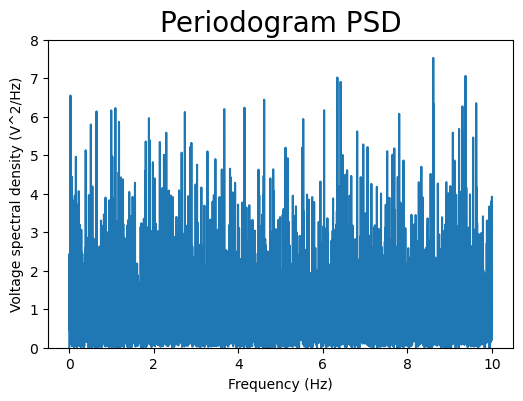

The width of each frequency bin is 0.002 Hz
The mean of the Periodogram PSD is 1.0208877050545644
[0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625

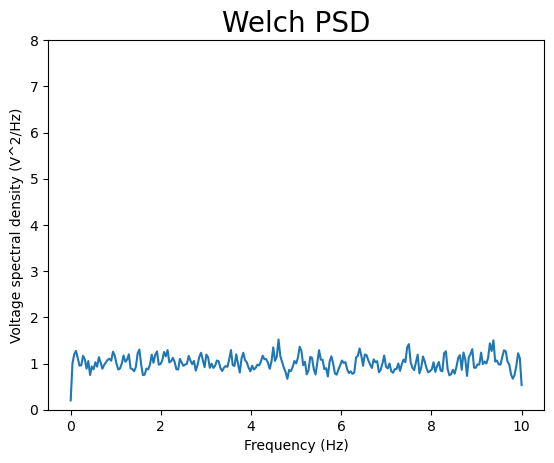

In [4]:
fs = 20 # Sampling rate
N = 10000 # Number of Data Points

time = np.arange(N) / fs  # these are the time coordinates of the voltage "measurements".  Total signal time is num of points / sampling rate

v = np.random.normal(scale=np.sqrt(10), size=time.shape) # add noise

# This code uses Periodogram to calculate a "full" power spectrum

f, Pxx_den_per = signal.periodogram(v, fs, 'boxcar', scaling='density')

plt.figure(figsize=(6,4))

plt.plot(f,Pxx_den_per)

plt.title('Periodogram PSD', fontsize=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage spectral density (V^2/Hz)')
#plt.xlim([5,5.1])
plt.ylim([0,8])

plt.show()

print("The width of each frequency bin is", (f[1]-f[0]),"Hz")
print("The mean of the Periodogram PSD is",np.mean(Pxx_den_per))


# This code uses Welch to calculate an averaged power spectrum

f, Pxx_den_wel = signal.welch(v, fs, nperseg=512)

# nperseg means "number per segment".  If the original signal,
# here called v, was N=10000 points long, and you divide it into
# segments each with 512 points, there will be around 20 segments
# (10000/512 ~ 20), and these will be averaged together to get the
# final PSD.  Because each segment is shorter, the frequency resolution
# will be lower.  Can you calculate what you would expect it to be?
# If you check the result of the Welch routine, were you correct?

plt.plot(f,Pxx_den_wel)
print(np.diff(f))
plt.title('Welch PSD', fontsize=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage spectral density (V^2/Hz)')
plt.ylim([0,8])


plt.show()



